In [61]:
import pandas as pd
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt
import psycopg2
import sqlalchemy
from sqlalchemy import create_engine, inspect, func
import numpy as np
from scipy import stats

In [7]:
from sqlalchemy import create_engine
engine = create_engine('postgresql://localhost:5432/sql_homework_db')
connection = engine.connect()


In [15]:
salaries_data = pd.read_sql("SELECT * FROM salaries", connection)
salaries_data.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


In [16]:
titles_data = pd.read_sql("SELECT * FROM titles", connection)
titles_data.head()


,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [17]:
combined_data = pd.merge(salaries_data, titles_data, on="emp_no", how="inner")
combined_data.head()


,emp_no,salary,from_date_x,to_date_x,title,from_date_y,to_date_y
0,10001,60117,1986-06-26,1987-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,65828,1996-08-03,1997-08-03,Staff,1996-08-03,9999-01-01
2,10003,40006,1995-12-03,1996-12-02,Senior Engineer,1995-12-03,9999-01-01
3,10004,40054,1986-12-01,1987-12-01,Engineer,1986-12-01,1995-12-01
4,10004,40054,1986-12-01,1987-12-01,Senior Engineer,1995-12-01,9999-01-01


In [33]:
grouped_df = combined_data.groupby("title").mean()
grouped_df = grouped_df.drop(columns = "emp_no")
grouped_df

,salary
title,
Assistant Engineer,48493.204786
Engineer,48539.781423
Manager,51531.041667
Senior Engineer,48506.751806
Senior Staff,58503.286614
Staff,58465.271904
Technique Leader,48580.505772


In [22]:
revised_grouped_df = grouped_df.reset_index()
revised_grouped_df

,title,salary
0,Assistant Engineer,48493.204786
1,Engineer,48539.781423
2,Manager,51531.041667
3,Senior Engineer,48506.751806
4,Senior Staff,58503.286614
5,Staff,58465.271904
6,Technique Leader,48580.505772


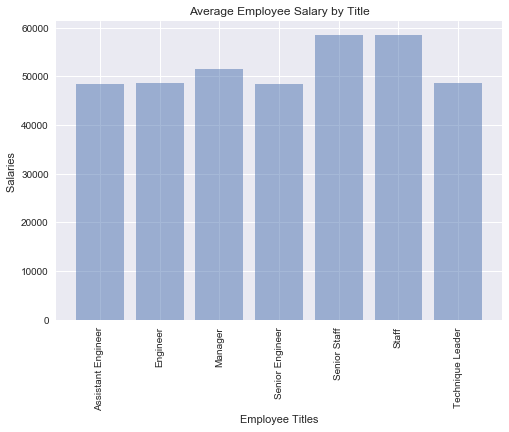

In [90]:
#Create a bar chart of average salary by title.

x_axis = revised_grouped_df["title"]
ticks = np.arange(len(x_axis))
y_axis = revised_grouped_df["salary"]
plt.bar(x_axis, y_axis, align="center", alpha=0.5)
plt.xticks(ticks, x_axis, rotation="vertical")
plt.ylabel("Salaries ")
plt.xlabel("Employee Titles")
plt.title("Average Employee Salary by Title")


plt.savefig("Avg_Salary_Title")


plt.show()

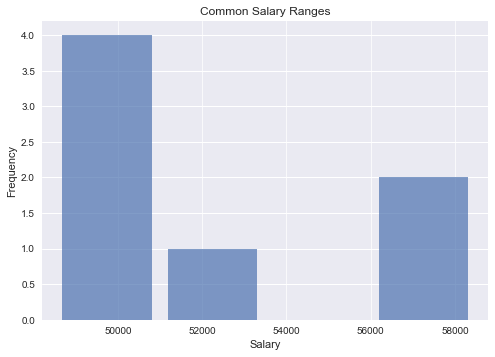

In [91]:
#Create a histogram to visualize the most common salary ranges for employees.

x = revised_grouped_df["title"]
tick = np.arange(len(x_axis))
y = revised_grouped_df["salary"]
n, bins, patches = plt.hist(y, bins="auto",
                            alpha=0.7, rwidth=0.85)

plt.grid(axis="x", alpha=0.75)
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.title("Common Salary Ranges")

plt.savefig("Common_Salary_Range")

plt.show()